Task 1
Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.




1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

- The aesthetics in this plot are represented by the variables used. 
- The aesthetic is Income on the x-axis, Life Expectancy on the y-axis. 
- The colors (fill) of the country bubbles are represented by regions: green for North and South America, yellow for Europe, blue for Africa, and red for Asia. 
- The size of the bubbles are reprsented by the population of the country. 

2. Import the q1data.csv dataset.

3. Recreate the plot as best you can using plotnine.

In [132]:
import pandas as pd

# import data set
q1data = pd.read_csv("/Users/achur/OneDrive/Desktop/School/CP Fall 2024/544/q1data.csv")
# remove any missing values
q1data = q1data.dropna()

from plotnine import ggplot, geom_point, aes, labs, scale_size, scale_y_continuous, geom_text, facet_wrap, geom_jitter, scale_x_continuous, geom_tile
from plotnine import theme, theme_bw, scale_x_log10, scale_fill_manual, element_text, geom_histogram, guides, guide_legend, geom_bar, scale_y_log10

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


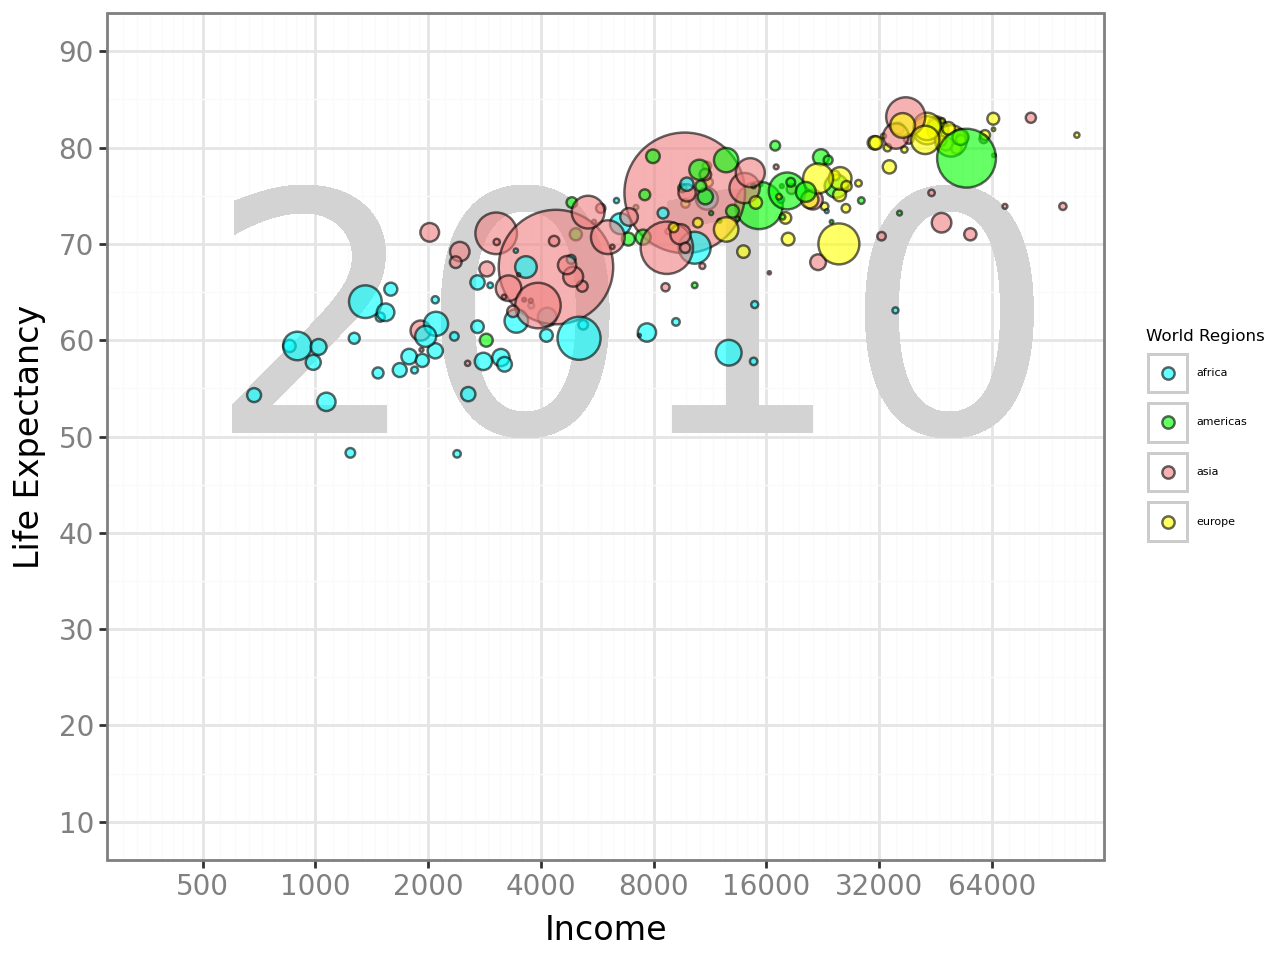

In [133]:
# create plot

(ggplot(q1data,
    aes( x = "income", y = "life_exp", size = "population", fill = "four_regions"))
    + geom_text(aes(x = 7000, y = 60, label = "2010"), size = 120, color = "lightgrey")
    + geom_point(alpha = 0.6, color = "black", stroke = 0.5)
    + labs(x = "Income", y = "Life Expectancy", fill = "World Regions")
    + scale_size(range = [.1, 24])
    + scale_x_log10(limits = [0, 128000], 
    breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], 
    labels = ["500", "1000", "2000", "4000", "8000", "16000", "32000", "64000"])
    + scale_y_continuous(limits = (10, 90), breaks = range(10, 91, 10))
    + scale_fill_manual(values = {"africa": "aqua", "americas": "lime", "europe": "yellow", "asia": "lightcoral"})
    + theme_bw()
    + guides(size = False, fill = guide_legend(override_aes = {"size": 2}))
    + theme(text = element_text(family = "Keyboard", size = 14), 
    axis_title = element_text(family = "Keyboard", size = 12, color = "black"), 
    axis_text = element_text(family = "Keyboard", size = 10, color = "gray"), 
    legend_title = element_text(size = 6),
    legend_text = element_text(size = 4))
    )

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

- The below plot is not ideal for visualizing the data because we have two variables we want to look at, and it is hard to do that with geom_bar other than to just count for one variable. It is also hard to visualize between the 4 different regions. There is also no way to look at each individual country within the regions with this graph, so the previous bubble chart graph is easier to interpret the data. 

<positron-console-cell-134>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


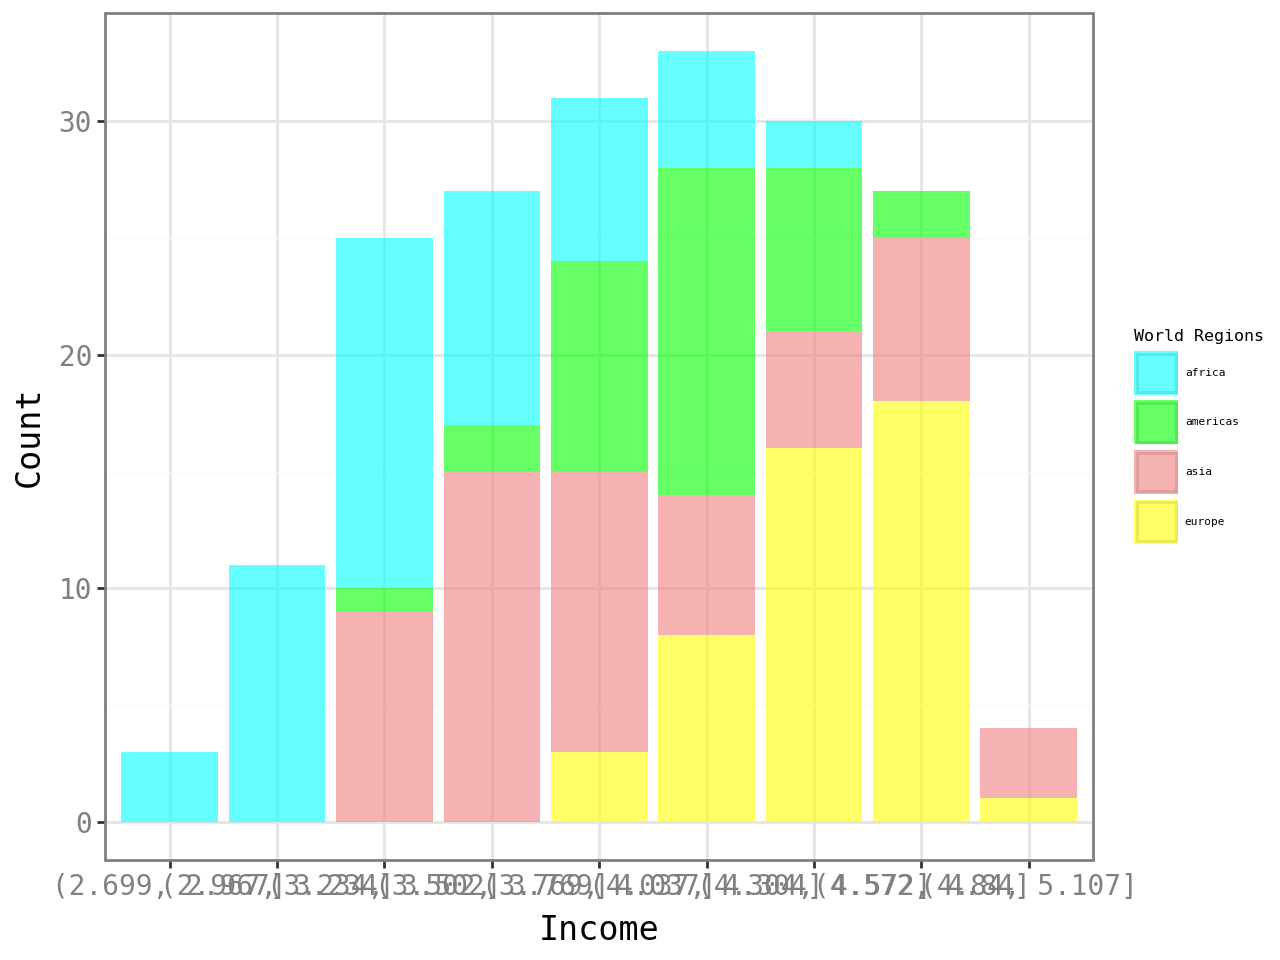

In [134]:
# Create plot using different geometry
import numpy as np
d1data = q1data[q1data["income"] > 0]
q1data['log_income'] = np.log10(q1data['income'])
q1data['log_income_bin'] = pd.cut(q1data['log_income'], bins=np.linspace(np.log10(500), np.log10(128000), 10))
bin_counts = q1data.groupby(['log_income_bin', 'four_regions']).size().reset_index(name='count')

(ggplot(bin_counts, aes(x='log_income_bin', y='count', fill='four_regions'))
         + geom_bar(stat='identity', position='stack', alpha=0.6)
        + labs(x="Income", y="Count", fill="World Regions")
        + scale_fill_manual(values={"africa": "aqua", "americas": "lime", "europe": "yellow", "asia": "lightcoral"})
        + theme_bw()
        + theme(text=element_text(family="monospace", size=14), 
                axis_title=element_text(family="monospace", size=12, color="black"), 
                axis_text=element_text(family="monospace", size=10, color="gray"), 
                legend_title=element_text(size=6),
                legend_text=element_text(size=4))
       )

Task 2
Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
- The aesthetics in this plot are represented by the variables used. 
- The aesthetic is Exports (% of GDP) on the x-axis, Imports (% of GDP) on the y-axis. 
- The colors (fill) of the country bubbles are represented by regions: green for North and South America, yellow for Europe, blue for Africa, and red for Asia. 
- The size of the bubbles are reprsented by the energy of the country. 

2. Import the q2data.csv dataset.

3. Recreate the plot as best you can using plotnine.

In [135]:
# import data set
q2data = pd.read_csv("/Users/achur/OneDrive/Desktop/School/CP Fall 2024/544/q2data.csv")
# remove any missing values
q2data = q2data.dropna()

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


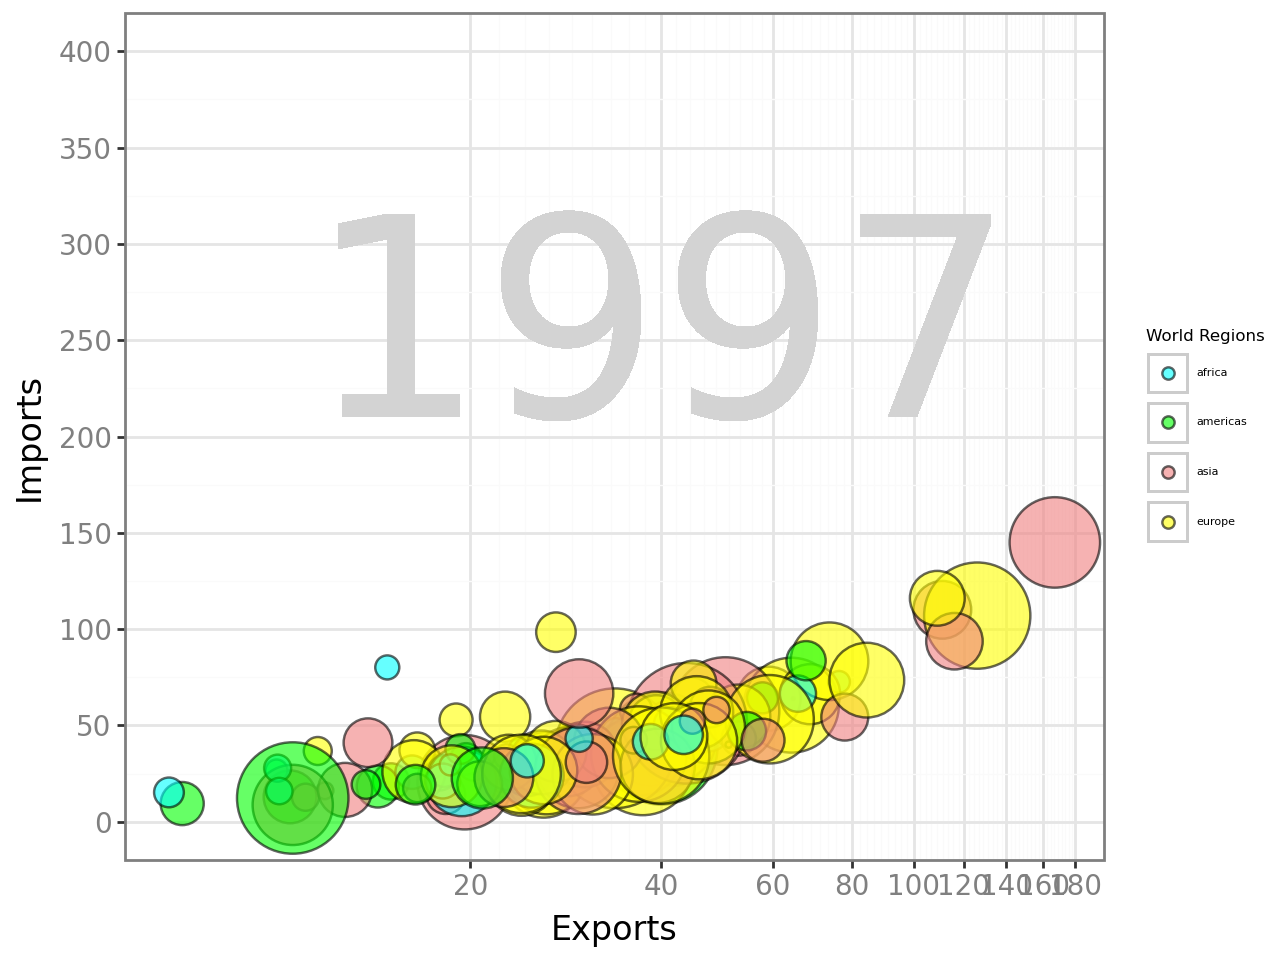

In [136]:
# Create plot

q2data['energy'] = q2data['energy'].str.replace('k', '').astype(float) * 1000

(ggplot(q2data,
    aes(x = "exports", y = "imports", size = "energy", fill = "four_regions"))
    + geom_text(aes(x = 40, y = 250, label = "1997"), size = 100, color = "lightgrey")
    + geom_point(alpha = 0.6, color = "black", stroke = 0.5)
    + labs(x = "Exports", y = "Imports", fill = "World Regions")
    + scale_size(range = (.1, 24))
    + scale_x_log10(limits = (0, 200), 
    breaks = [20, 40, 60, 80, 100, 120, 140, 160, 180], 
    labels = ["20", "40", "60", "80", "100", "120", "140", "160", "180"])
    + scale_y_continuous(limits = (0, 400), breaks = range(0, 401, 50))
    + scale_fill_manual(values = {"africa": "aqua", "americas": "lime", "europe": "yellow", "asia": "lightcoral"})
    + theme_bw()
    + guides(size = False, fill = guide_legend(override_aes = {"size": 2}))
    + theme(text = element_text(family = "Keyboard", size = 14), 
    axis_title = element_text(family = "Keyboard", size = 12, color = "black"), 
    axis_text = element_text(family = "Keyboard", size = 10, color = "gray"), 
    legend_title = element_text(size = 6),
    legend_text = element_text(size = 4))
    )

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

- The below plot is a good visualization is you want to look at each world region individually. If you wanted to look at how each country from different regions compared, it can be difficult to look at with 4 different subcharts. The above visualization is still better. 

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_jitter : Removed 33 rows containing missing values.


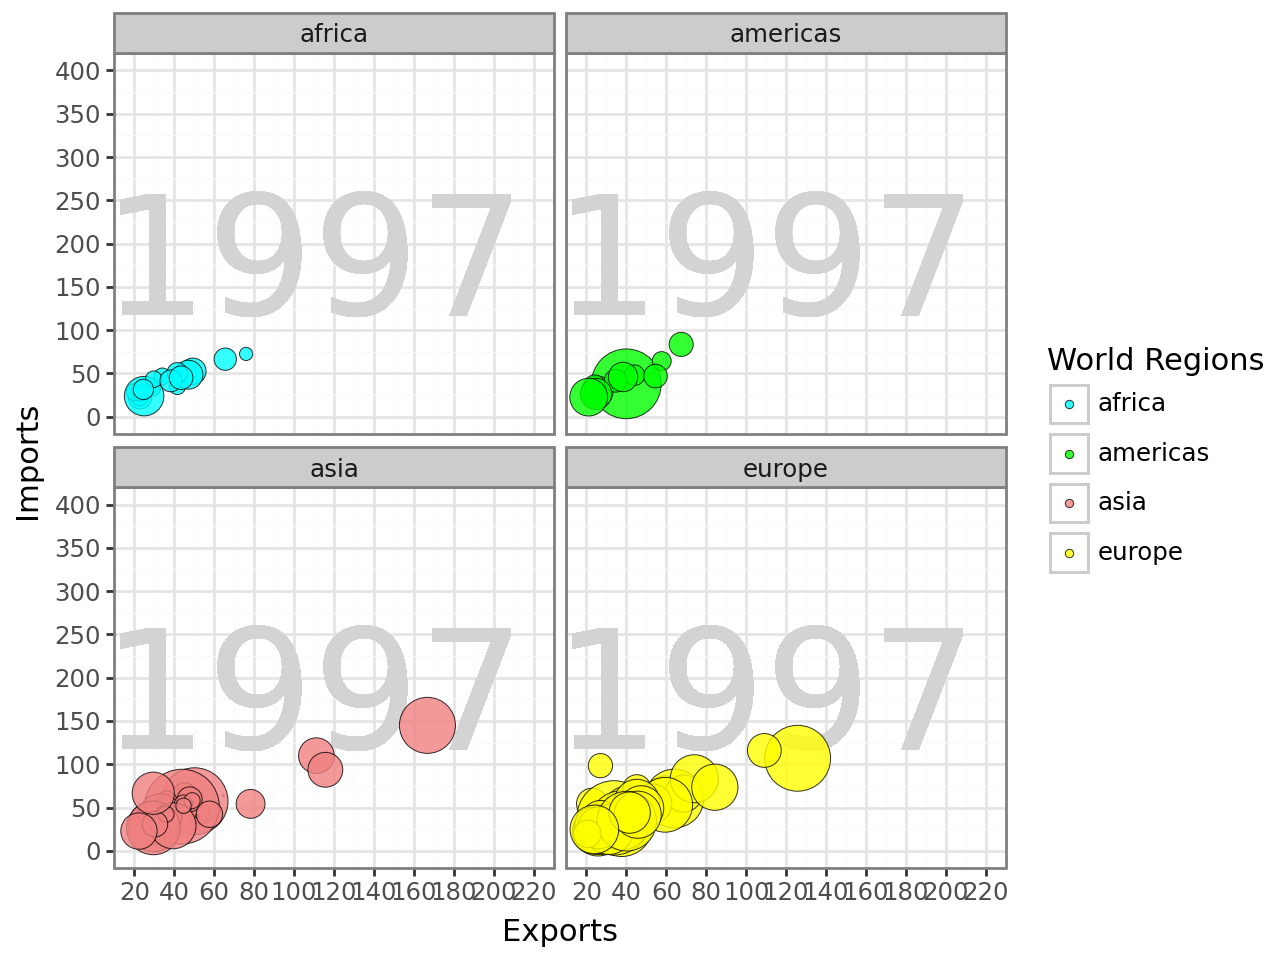

In [137]:
# Create plot with other geometry

(ggplot(q2data, aes(x = "exports", y = "imports", size = "energy", fill = "four_regions"))
    + geom_text(aes(label = "1997"), x = 110, y = 170, color = "lightgrey", size = 60, alpha = 0.5)
    + geom_jitter(alpha = 0.8, color = "black", stroke = 0.2)
    + labs(x = "Exports", y = "Imports", fill = "World Regions")
    + scale_size(range = [.1, 15])
    + scale_x_continuous(limits = (20, 220), breaks = list(range(20, 221, 20))
    )
    + scale_y_continuous(limits = (0, 400), breaks = list(range(0, 401, 50))
    )
    + scale_fill_manual(values = {"africa": "aqua", "americas": "lime", "europe": "yellow", "asia": "lightcoral"})
    + guides(size = False)
    + facet_wrap("~four_regions")
    + theme_bw()
)

Task 3
Below is a final plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
- The aesthetics in this plot are represented by the variables used. 
- The aesthetic is Individuals using the Internet on the x-axis, Imports GDP/capita on the y-axis. 
- The colors (fill) of the country bubbles are represented by regions: green for North and South America, yellow for Europe, blue for Africa, and red for Asia. 
- The size of the bubbles are reprsented by the income of the country.

2. Import the q3data.csv dataset.

3. Recreate the plot as best you can using plotnine.

In [138]:
# import data set
q3data = pd.read_csv("/Users/achur/OneDrive/Desktop/School/CP Fall 2024/544/q3data.csv")
# remove any missing values
q3data = q3data.dropna()

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


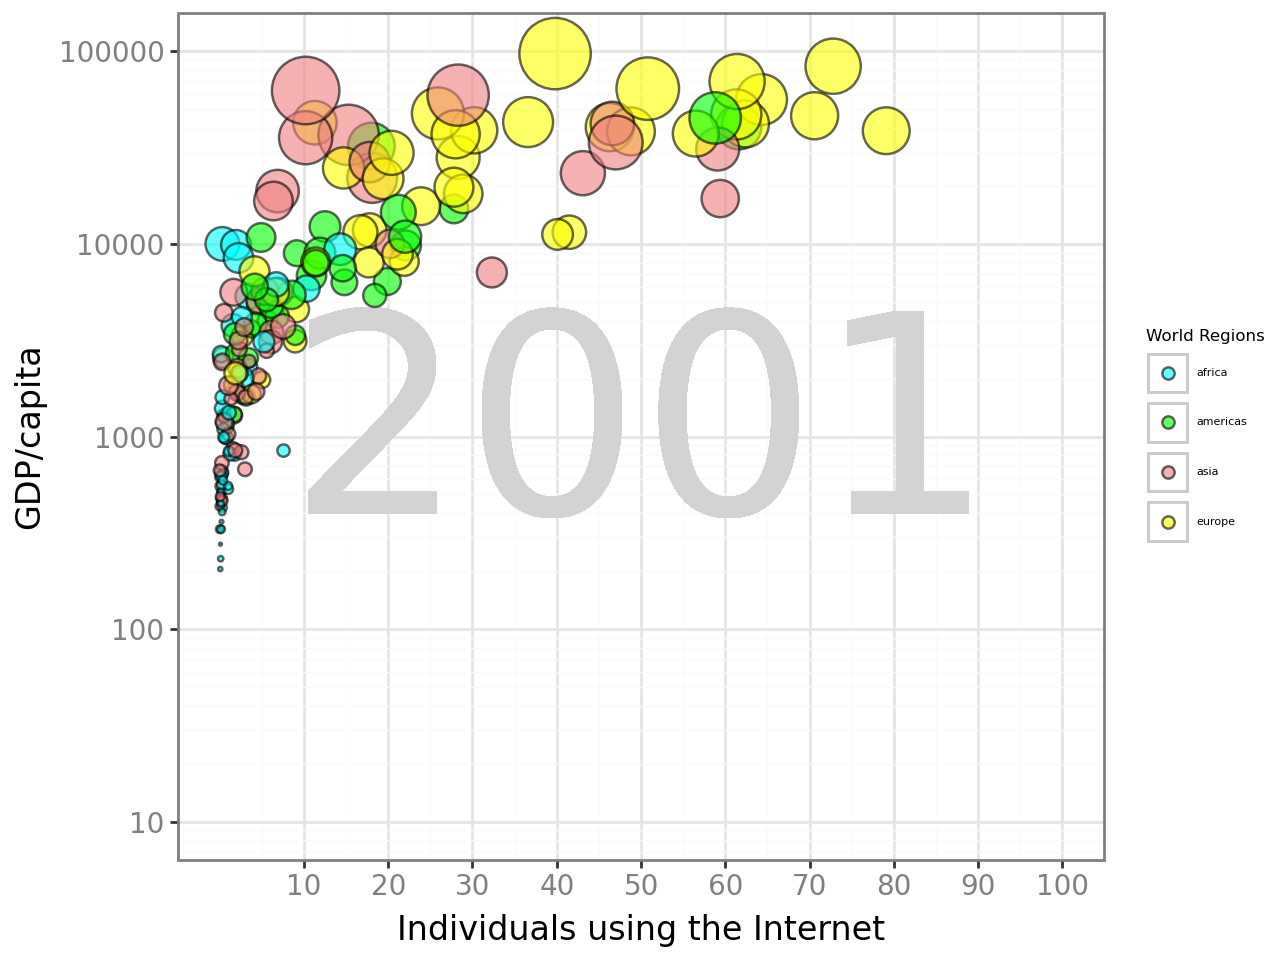

In [139]:
#create plot

(ggplot(q3data,
    aes(x = "internet_users", y = "gdp", size = "income", fill = "four_regions"))
    + geom_text(aes(x = 50, y = 1000, label = "2001"), size = 100, color = "lightgrey")
    + geom_point(alpha = 0.6, color = "black", stroke = 0.5)
    + labs(x = "Individuals using the Internet", y = "GDP/capita", fill = "World Regions")
    + scale_size(range = (.1, 14))
    + scale_x_continuous(limits=(0, 100), breaks=range(10, 101, 10))
    + scale_y_log10(limits=(10, 100000), breaks=[10, 100, 1000, 10000, 100000], labels=["10", "100", "1000", "10000", "100000"])
    + scale_fill_manual(values = {"africa": "aqua", "americas": "lime", "europe": "yellow", "asia": "lightcoral"})
    + theme_bw()
    + guides(size = False, fill = guide_legend(override_aes = {"size": 2}))
    + theme(text = element_text(family = "Keyboard", size = 14), 
    axis_title = element_text(family = "Keyboard", size = 12, color = "black"), 
    axis_text = element_text(family = "Keyboard", size = 10, color = "gray"), 
    legend_title = element_text(size = 6),
    legend_text = element_text(size = 4))
    )

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_tile : Removed 1 rows containing missing values.
C:\Users\achur\Downloads\python\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


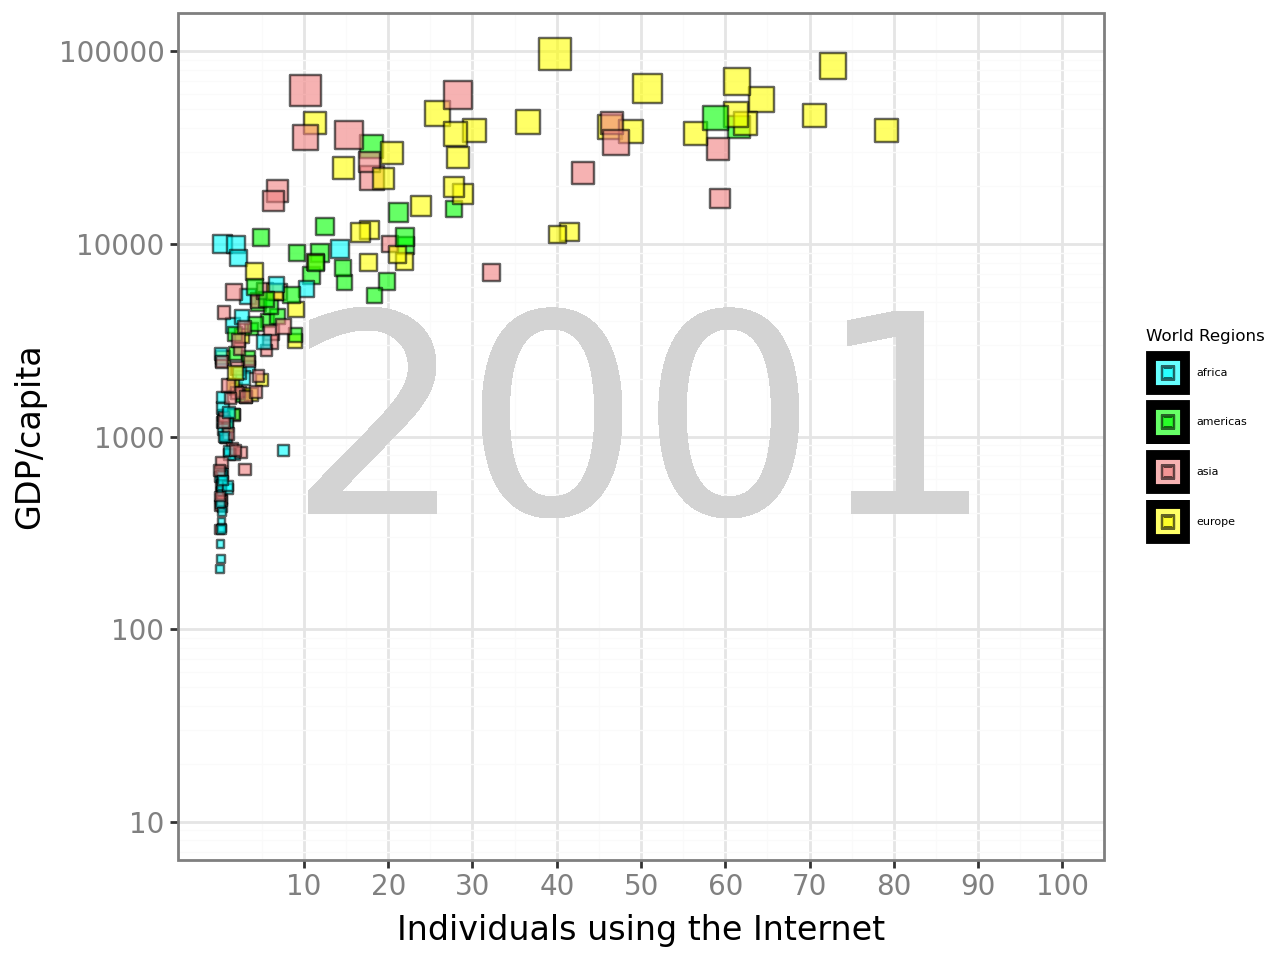

In [150]:
# Create plot for other geometry 

(ggplot(q3data,
    aes(x = "internet_users", y = "gdp", size = "income", fill = "four_regions"))
    + geom_text(aes(x = 50, y = 1000, label = "2001"), size = 100, color = "lightgrey")
    + geom_tile(aes(width = 1, height = 2000), alpha = 0.6, color = "black")
    + geom_point(aes(size='income'), shape = "s", alpha=0.6, color='black', stroke=0.5)
    + labs(x = "Individuals using the Internet", y = "GDP/capita", fill = "World Regions")
    + scale_x_continuous(limits=(0, 100), breaks=range(10, 101, 10))
    + scale_y_log10(limits=(10, 100000), breaks=[10, 100, 1000, 10000, 100000], labels=["10", "100", "1000", "10000", "100000"])
    + scale_fill_manual(values = {"africa": "aqua", "americas": "lime", "europe": "yellow", "asia": "lightcoral"})
    + theme_bw()
    + guides(size = False, fill = guide_legend(override_aes = {"size": 2}))
    + theme(text = element_text(family = "Keyboard", size = 14), 
    axis_title = element_text(family = "Keyboard", size = 12, color = "black"), 
    axis_text = element_text(family = "Keyboard", size = 10, color = "gray"), 
    legend_title = element_text(size = 6),
    legend_text = element_text(size = 4))
    )